In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re

# Problem 1

In [2]:
train_reviews = ["""I’ve seen a lot of bad reviews for this phone based on issues with the seller. Granted, some of those reviews say it took a few weeks for the problems to appear so I’ll edit this if that happens, but wow was I happy with what I got. Not only did it come with a charger (there’s some debate on that in other reviews), but it even had a clear bumper case. That was neither expected nor necessary but I appreciated it (I bought a Unicorn Beetle case which I have used and loved before on other phones). There wasn’t a scratch on this phone and it started working right away for me. The battery seems to be holding up fine. All in all I’d say this seems like a steal. If it self destructs on me in the next few weeks I’ll update this. UPDATE: It's been a few months and a trip overseas since I wrote that initial review, and it remains a solid decision I'm very happy with.""", """This phone looks and performs great like it's brand new. Not one scratch. The phone came with a screen protector and a charger. I was surprised as other reviews said they did not get one. For $269, I feel like this was a steal, compared to other listings. Hopefully nothing goes wrong with the phone later. But with the Amazon 90 day guarantee I'm a little more at ease about possible return. Never bought a refurbished phone before. Not sure what to expect. As far as my order, I am happy with it.""", """Don't listen to bad reviews! My phone arrived in great condition. There are no scratches on the glass, and there is no visible wear and tear on the case. It works perfectly. I inserted my carrier-provided SIM card in the SIM tray and it was immediately available on AT&T's network. A SIM tray key was included in the box along with protective plastic covers for the screen. A charging cable and standard outlet plug were also included in the box. This version of the iPhone does not have a headphone jack. I did not receive a headphone insert in the box, but (#1) I don't need one as all of my headphones are Bluetooth and (#2) I don't know if Apple included this in the original packaging so this is just a courtesy note for potential buyers of the iPhone 7, not a complaint. The seller contacted me after I received my phone to make sure I was happy with the purchase and I am.""", """Love this phone! I am so glad I bought a refurbished one. I took it to the Apple store just in case to do a diagnostics on it and said that it was refurbished and bought through Amazon, and Apple checked it and said everything is great. Very happy with my purchase.""", """First, seller did a great job and I think I got a good price for an iPhone 7, I just think ALL CELL PHONES are way way way too expensive. When a Cell phone costs more than a good laptop computer that is too expensive. Second all Smart phones have bad battery life. Apple's iPhones are no exception. There is a mode on the iPhone 7 to allow for an extended battery life setting. But I see no difference between the extended setting and the normal setting. I do not use my phone except for emergencies so I would expect the phone to last 5-6 days between charging, but I am averaging 3-4 days between charging. I am having an issue that the WiFi doesn't see both of my wireless networks (dual band router). Seller tried to help but Apple's support said if it sees a network that's all they care about. Phone appears to be working fine and so far I am happy with it.""", """Received prompt delivery of the phone. I inserted my 'sim card' and the phone was functional with no issues and I could make and receive calls right away, so far so good. I received the phone which is cosmetically in very good condition and I am quite happy with my purchase with exception of two minor issues which I believe someone could provide me guidance to resolve or trouble shoot.""", """Overall, the phone isn't too bad for the price. It came already scratched up, overheats more than a normal iPhone (I've had tons of iPhones). The delivery process of just getting the phone was pretty stressful, I'm a month and half in using the iPhone and I called customer service to see if they could replace my iphone because it got to the point where my hands feel the burning from the phone... the lady was so unhelpful, bland and kind of rude. The return proccess would be such a hassle and leave me phoneless so I decided to keep the phone instead. All the functions work fine, it's just that the iphone started heating up the moment I got it. I don't usually write reviews no matter how good or bad a product is, but I've never received such bad service from a company, especially amazon sellers. I'm basically stuck with the phone, or be phoneless. I would recommend the phone, but just know there will definitely some things you need to deal with. HAVE A NICE DAY TO WHOEVER IS READING :)""", """The iPhone 7 I purchased was "certified refurbished" and labeled as "new" quality but doesn't work. The phone looks great, but when I first turned it on it was in a restart loop. This was a bad sign to begin with, but I gave it the benefit of the doubt and connected it to my computer. When I finally got it to restore to factory settings, the screen started glitching to the point where there was nothing to stop it, and if it did get to the startup screen, it was non-responsive.""", """Initially I was happy with the phone. It looked great physically and had no signs of wear and tear. However, the battery health was lower than I wanted; the phone said the battery health was 88%. However, I knew from the ad, that it could ship with as low as 85%, so I can't complain too much about that. The biggest issue with the phone that was an absolute deal breaker was that it frequently crashed and closed apps on me. Other times it would freeze up. Imagine having an emergency and having to make a phone call, only to find out that your phone decided to freeze up?! I have a family, so that's completely unacceptable. The phone also seemed to have connectivity issues and would not connect well with my wifi. It was slower than my other devices on my wifi and would sometimes freeze up. With the problems that I was having, I'm thinking it was a bad main board or "motherboard". The seller was MobileSpree. I contacted them and asked for an exchange. They refused to do an exchange and said my only option was to return it. I returned it with the shipping label provided by Amazon. However, even after 5 days of having the phone back, they would not refund my money. I had to get Amazon involved to get a refund. Overall, don't buy. It was a waste of time and money and a hassle to get refunded.""", """Be cautious - if you have ANY issues at all, return phone immediately. We got one for my daughter, paid $244 and it didn’t last 4 months. Seller will not replace/return as it is past 90 days. She had intermittent issues with service connections shortly after receiving the phone. When it finally stopped connecting at all and we had it checked at the AT&T store, they told us it was an internal issue with the SIM card brackets that connects to the mother board. Basically causing a fatal error and cannot get any service connection. I contacted the seller and received the generic “past the 90 day warranty” so there is nothing they will do about it. We may try to have it repaired, but the repair shop is looking at $100 to inspect and possibly repair, if it can be repaired. I guess that’s our expensive mistake, but at least we can warn others."""]
train_sentiment = ["Positive", "Positive", "Positive", "Positive", "Positive", "Positive", "Negative", "Negative", "Negative", "Negative"]
data = pd.DataFrame({"review":train_reviews, "sentiment":train_sentiment})
data

,review,sentiment
0,I’ve seen a lot of bad reviews for this phone ...,Positive
1,This phone looks and performs great like it's ...,Positive
2,Don't listen to bad reviews! My phone arrived ...,Positive
3,Love this phone! I am so glad I bought a refur...,Positive
4,"First, seller did a great job and I think I go...",Positive
5,Received prompt delivery of the phone. I inser...,Positive
6,"Overall, the phone isn't too bad for the price...",Negative
7,"The iPhone 7 I purchased was ""certified refurb...",Negative
8,Initially I was happy with the phone. It looke...,Negative
9,"Be cautious - if you have ANY issues at all, r...",Negative


In [3]:
class Bayes_Network:
    def __init__(self):
        self.features = ''
        self.probs = ''
        self.keys = ''
    def train(self, bow, stuff, classes):
        self.keys = bow
        self.probs = {}
        data = self.detect(bow, stuff, classes)
        self.features = data
        total = len(classes)
        classes = set(classes)
        for clss in classes:
            temp = {}
            temp_df = data[(data["Sentiment"]==clss)]
            count = len(temp_df)
            for word in bow:
                length = len(temp_df[temp_df[word]==1])
                temp[word] = (length/count)
            temp[clss] = count/total
            self.probs[clss] = temp
    def detect(self,bow, stuff, classes):
        attrs = []
        for thing in bow:
            attrs.append(thing)
        attrs.append("Sentiment")
        res = []
        for each in range(len(stuff)):
            temp =[]
            thing = stuff[each].lower()
            clss = classes[each]
            for word in bow:
                if re.search(word.lower(), thing) != None:
                    temp.append(1)
                else:
                    temp.append(0)
            temp.append(clss)
            res.append(temp)
        data = pd.DataFrame(res, columns = attrs)
        return data
    def predict(self, sub):
        probs = []
        pos = 1
        neg = 1
        for ind in self.keys:
            if re.search(ind.lower(),sub.lower()):
                pos *= self.probs["Positive"][ind]
                neg *= self.probs["Negative"][ind]
        pos *= self.probs["Positive"]["Positive"]
        neg *= self.probs["Negative"]["Negative"]
        result = 1234
        if neg > pos:
            result = ("Negative")
        elif neg < pos:
            result = ("Positive")
        else:
            result =("Neutral")
        data = pd.DataFrame([[pos, neg, result]], columns = ["Positive", "Negative", "Sentiment"])
        return data

In [4]:
classes = ["Positive","Positive","Positive","Positive","Positive","Positive","Negative","Negative","Negative","Negative"]
bow = ['Happy', 'Great', 'Bad', 'Return']
model = Bayes_Network()
model.train(bow, train_reviews, classes)

In [5]:
test1 = "The phone arrived in pretty decent condition. The front screen was scratch-free and the display is great, but there is a long scratch on the back of the phone. This doesn't bother me much because I always have a case on my phone. However, the issue with this phone is that the cellular signal won't work; the device detects the sim but the signal is bad. Apparently this is an issue with some iPhone 7 models, but the any free of charge repair is not valid because the phone is coming from a third party seller. After speaking with Apple, Verizon (my mobile carrier), AND Amazon, I've reached the conclusion that the issue is with the phone. I've tried everything to troubleshoot, but I will unfortunately have to return the item and get another one."
model.predict(test1)

,Positive,Negative,Sentiment
0,0.033333,0.1125,Negative


In [6]:
test2 = "iPhone 7 Black came in excellent condition. Like new. No scratches or scuffs. Works great. Was happy for couple months until phone started to develop issues with hearing callers and vs versa. Callers can’t hear me and I can’t hear callers, the sound is bad. Checked settings . Disabled WiFi calling. Hard reset phone. Updated iOS. Happens randomly. Suspect possible known defects on iPhone 7 with audio IC chips. I want to return the phone but I’m waiting to se for a month"
model.predict(test2)

,Positive,Negative,Sentiment
0,0.033333,0.028125,Positive


# Problem 2

In [7]:
data = pd.read_csv("inputHW_ExtraCredit.csv")
data

,X,Y
0,0.318328,0.750789
1,0.344461,-0.648483
2,0.357117,1.122161
3,0.461714,-0.024687
4,0.971318,2.558952
5,0.975404,2.707666
6,1.269868,3.532343
7,1.418863,2.639893
8,1.576131,1.487547
9,1.711867,2.339642


In [8]:
X = data.loc[:,"X"]
Y = data.loc[:,"Y"]
x = np.array(X)
y = np.array(Y)

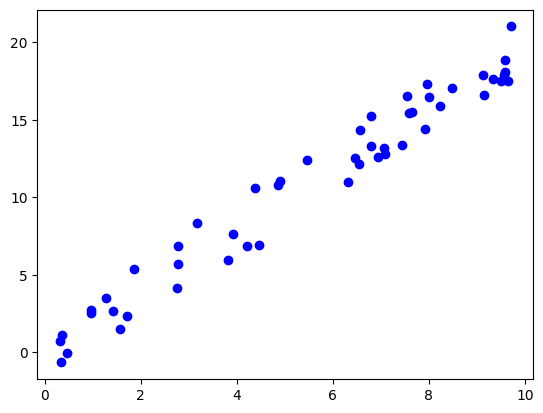

In [9]:
plt.plot(x,y, 'bo')
plt.show()

In [10]:
class Network:
    def __init__(self, lr, bias=0):
        self.learningrate = lr
        self.weights = 1
        self.bias = bias
    def fit(self, x, y, rounds=1000):
        for each in range(rounds):
            error = 0
            temp = self.predict(x)
            for roundn in range(len(temp)):
                error += math.pow((y[roundn]-temp[roundn]), 2)
                if temp[roundn] != y[roundn]:
                    self.update_weights(x[roundn], y[roundn], temp[roundn])
            error /= 2
            if ((each+1)%10 == 0 or each == 0):
                print(f"Round {each+1}, sum of squared errors: {error}")
        return
    def predict(self, x):
        return np.dot(self.weights, x)+self.bias
    def update_weights(self, x, y, pred):
        self.weights = self.weights+self.learningrate*x*(y-pred)

In [11]:
model = Network(lr = 0.00009)

In [12]:
model.fit(x, y, rounds=100)

Round 1, sum of squared errors: 947.3478161507096
Round 10, sum of squared errors: 61.34807929077814
Round 20, sum of squared errors: 35.53204152952435
Round 30, sum of squared errors: 35.02960277734994
Round 40, sum of squared errors: 35.0198241776275
Round 50, sum of squared errors: 35.01963386385868
Round 60, sum of squared errors: 35.01963015992031
Round 70, sum of squared errors: 35.019630087833264
Round 80, sum of squared errors: 35.0196300864303
Round 90, sum of squared errors: 35.01963008640299
Round 100, sum of squared errors: 35.01963008640246


In [13]:
pred = model.predict(x)
pred

array([ 0.6234186 ,  0.67459652,  0.69938216,  0.90422652,  1.90224143,
        1.91024397,  2.48692632,  2.7787205 ,  3.08671509,  3.35254235,
        3.65973739,  5.405711  ,  5.42329575,  5.45414533,  6.21011745,
        7.47249044,  7.68142495,  8.2598278 ,  8.59242659,  8.72641809,
        9.50565982,  9.59160961, 10.71019878, 12.3842057 , 12.65747803,
       12.83696423, 12.84211112, 13.29243753, 13.31138561, 13.6076141 ,
       13.82729839, 13.89229309, 14.55360288, 14.77988211, 14.83968125,
       14.99198032, 15.51469135, 15.57329826, 15.67279676, 16.12670518,
       16.62945874, 17.88767153, 17.9338836 , 18.29144521, 18.60927216,
       18.74528197, 18.75193837, 18.79082444, 18.89650254, 19.00821524])

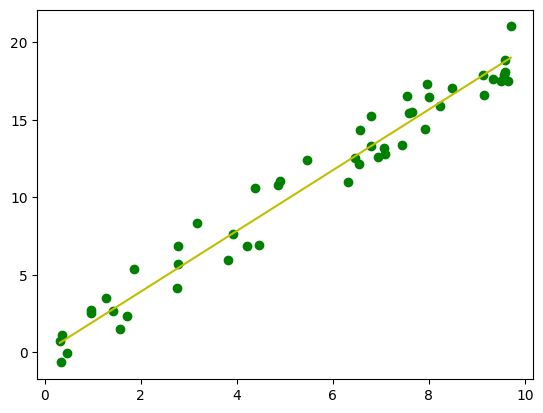

In [14]:
plt.plot(x,y, 'go')
plt.plot(x,pred, 'y')
plt.show()